# 实验1 线性模型

### 一、实验目的

掌握线性回归、对数几率回归和线性判别分析的原理与应用，熟悉Scikit-learn中算法的使用。  

### 二、实验内容

####  1.线性回归 

#### （1）随机线性数据的最小二乘回归  
  参考教材3.2节，线性模型$f\left(\boldsymbol x\right) = \boldsymbol w^T + b$ 参数的最优解为
 
  $$\hat{\boldsymbol w}^* = \left(X^TX\right)^{-1}X^T\boldsymbol y$$ 
      
利用随机生成的线性数据来学习模型并进行验证。

![](https://ai-studio-static-online.cdn.bcebos.com/3a0847372cc7433c8917bccd718e40ed2bed08f278e44a30b9372212fef41069)

1）生成数据：

In [56]:
#随机线性数据的最小二乘回归
import matplotlib.pyplot as plt
import numpy as np
X= 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

In [57]:
X

array([[1.17664245],
       [1.461656  ],
       [0.14566793],
       [1.52491582],
       [0.859812  ],
       [1.10754862],
       [0.41063459],
       [1.280522  ],
       [0.68488486],
       [0.80109468],
       [1.77760338],
       [0.93909438],
       [0.43000414],
       [1.83068816],
       [1.58285627],
       [1.46267421],
       [0.32844509],
       [0.25580127],
       [1.44847739],
       [0.57704844],
       [1.51167853],
       [0.50741807],
       [0.91077406],
       [0.86530709],
       [1.19681409],
       [1.95466752],
       [1.61070019],
       [1.37513199],
       [1.94401128],
       [0.13845391],
       [0.22628309],
       [0.32751829],
       [1.78694941],
       [0.06965989],
       [0.20787981],
       [0.06935632],
       [1.9944359 ],
       [1.66312799],
       [0.08727985],
       [0.43825074],
       [1.07131862],
       [0.03423423],
       [1.64934751],
       [0.5361271 ],
       [1.7263371 ],
       [0.94040596],
       [0.13399977],
       [1.486

2）模型学习

In [58]:
Xb = np.c_[np.ones((100,1)), X]
w_best = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)

3） 预测

<function matplotlib.pyplot.show(close=None, block=None)>

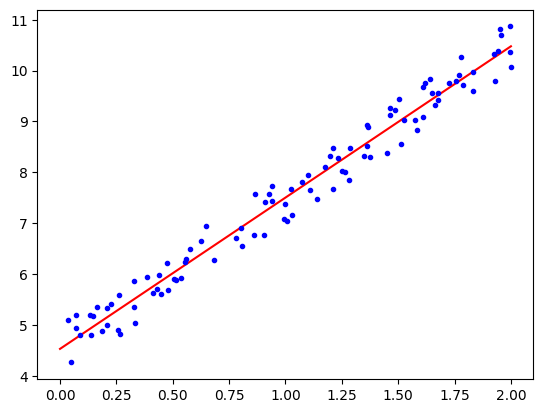

In [59]:
Xnew = np.array([[0],[2]])
Xnewb = np.c_[np.ones((2,1)), Xnew]
y_predict = Xnewb.dot(w_best)

plt.plot(Xnew,y_predict,"r-")
plt.plot(X,y,"b.")
#plt.axis([0,2,0,15])
plt.show

#### （2）使用Scikit-Learn 实现

阅读Scikit-learn手册中最小二乘线性回归的用法（https://scikit-learn.org/0.20/modules/linear_model.html#ordinary-least-squares）。

参考代码：

In [60]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)
#......

LinearRegression()

使用LinearRegression类来实现（1）中回归任务。

In [61]:
#使用LinearRegression的随机数据回归
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.predict(Xnew)
lin_reg.intercept_, lin_reg.coef_

(array([4.52881403]), array([[2.97451683]]))

#### （3）多元线性回归

参考Scikit-learn手册中最小二乘线性回归的例程，并进行修改，实现对Diabetes dataset数据的多元线性回归。

Data Set Characteristics:

![](https://ai-studio-static-online.cdn.bcebos.com/6530306ebf524389b4e30c67825475e51548099622854d2b8087669caf900a70)

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).


In [62]:
#Load and extract data
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target

常用评估回归拟合效果的指标：

* 均方误差（Mean Squared Error）：测试数据集中所有样本点的预测误差的平方的均值；

![](https://ai-studio-static-online.cdn.bcebos.com/834c6c5a2ab04333a3b26686c72b28dae3e9a3a1821640e3833894f091b82a62)

* R方得分（R2 Score）：确定性相关系数，用于衡量

![](https://ai-studio-static-online.cdn.bcebos.com/fa58070fad8f4dd2bb8088ec04f9f5532e5c421ac5744888985ead72cc907d35)

#### 实验与讨论
* 选择特征数据中不同属性组合作为样本特征值，比较回归性能并分析原因（比较至少三组）。
* 选择不同训练样本集和测试样本集的划分，比较回归性能（比较至少三组）。

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 加载糖尿病数据集
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target

# 特征组合
feature_combinations = [
    [0, 1],  # 第一组：选择前两个特征
    [0, 1, 2],  # 第二组：选择前三个特征
    [0, 1, 2, 3]  # 第三组：选择前四个特征
]

# 数据集划分比例
split_ratios = [0.2, 0.3, 0.4]

# 评估不同特征组合的回归性能
print("\n不同特征组合的回归性能:")
print("| 特征组合 | 均方误差 | R^2 |")
print("| -------- | -------- | -------- |")
for i, features in enumerate(feature_combinations):
    X = diabetes_X[:, features]
    X_train, X_test, y_train, y_test = train_test_split(X, diabetes_y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"| 组合 {i + 1} | {mse:.2f} | {r2:.2f} |")

# 评估不同数据集划分的回归性能
print("\n不同数据集划分的回归性能:")
print("| 属性 | 均方误差 | R^2 |")
print("| -------- | -------- | -------- |")
for i, ratio in enumerate(split_ratios):
    X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=ratio, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"| 划分比例 {i + 1}（测试集比例 {ratio}） | {mse:.2f} | {r2:.2f} |")


不同特征组合的回归性能:
| 特征组合 | 均方误差 | R^2 |
| -------- | -------- | -------- |
| 组合 1 | 5310.52 | -0.00 |
| 组合 2 | 4056.67 | 0.23 |
| 组合 3 | 3718.71 | 0.30 |

不同数据集划分的回归性能:
| 属性 | 均方误差 | R^2 |
| -------- | -------- | -------- |
| 划分比例 1（测试集比例 0.2） | 2900.19 | 0.45 |
| 划分比例 2（测试集比例 0.3） | 2821.75 | 0.48 |
| 划分比例 3（测试集比例 0.4） | 2833.00 | 0.52 |


#### 2. 对数几率回归
  对数几率回归模型为
  
 $ln\frac{y}{1-y} = \boldsymbol w^T + b$ 

阅读Scikit-learn手册（https://scikit-learn.org/0.20/modules/linear_model.html#logistic-regression），熟悉LogisticRegression的用法。

#### （1）两类数据分类

In [64]:
#绘制分类结果图形的函数
def plot_classifier(classifier, X, y):
    # define ranges to plot the figure 
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot 
    plt.figure()

    # choose a color scheme you can find all the options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))

    plt.show()

In [65]:
# input data
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2],[1.2, 1.9]])
y = np.array([0, 0, 0, 1, 1, 1])
# initialize the logistic regression classifier
logregr = linear_model.LogisticRegression(solver='liblinear', C=100)
 # train the classifier
logregr.fit(X, y)

LogisticRegression(C=100, solver='liblinear')

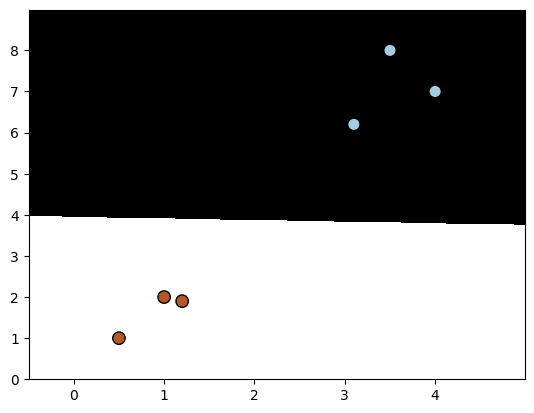

In [66]:
 # draw datapoints and boundaries
plot_classifier(logregr, X, y)

#### （2）多类数据分类

Scikit-learn中的LogisticRegression可以实现"一对多"分类或Softmax回归的多类分类。以鸢尾花数据为例，应用LogisticRegression进行多类分类。

Data Set Characteristics:

![](https://ai-studio-static-online.cdn.bcebos.com/e75773b7c55d497b96df7443f5033735936a5f4dcd244dacb4e791590ecd65f8)

In [70]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,1:3]
y = iris.target

In [71]:
logregr = linear_model.LogisticRegression(solver='liblinear', C=100)
 # train the classifier
logregr.fit(X, y)
logregr.score(X,y)

0.9533333333333334

#### 实验与讨论
* 以平均精度（LogisticRegression.score(X,y)）为指标，比较不同特征组合与数据集划分的分类性能（至少三组）。
* 了解其它分类性能度量指标实现方法（选做）。

Test size: 0.2, Accuracy: 1.0


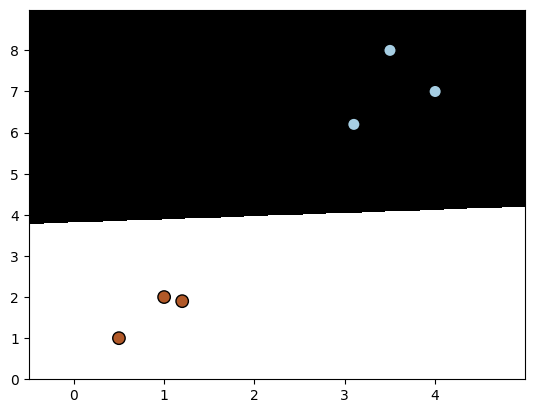

Test size: 0.3, Accuracy: 1.0


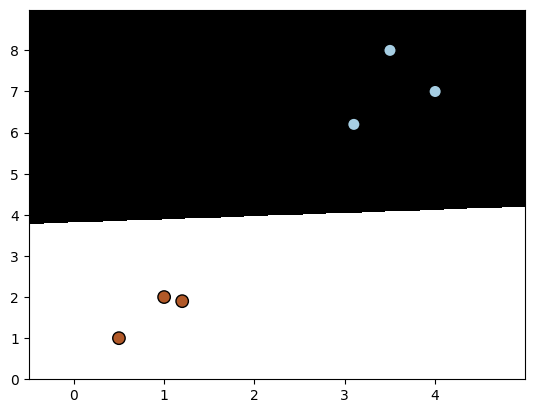

Test size: 0.4, Accuracy: 1.0


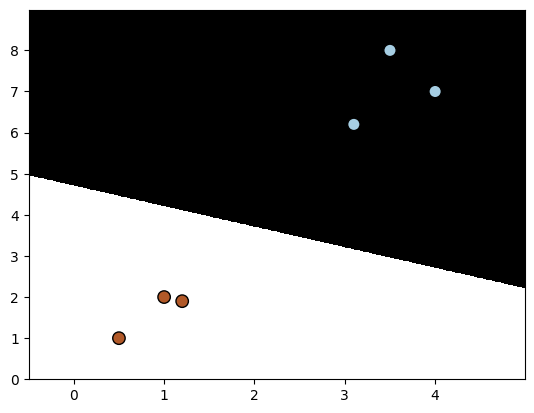

Precision: 0.0
Recall: 0.0
F1-score: 0.0


/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# 绘制分类结果图形的函数
def plot_classifier(classifier, X, y):
    # define ranges to plot the figure 
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot 
    plt.figure()

    # choose a color scheme you can find all the options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0]) - 1), int(max(X[:, 0]) + 1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1]) - 1), int(max(X[:, 1]) + 1), 1.0)))

    plt.show()


# input data
X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2], [1.2, 1.9]])
y = np.array([0, 0, 0, 1, 1, 1])

# 不同的数据集划分比例
test_sizes = [0.2, 0.3, 0.4]

for test_size in test_sizes:
    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # initialize the logistic regression classifier
    logregr = linear_model.LogisticRegression(solver='liblinear', C=100)
    # train the classifier
    logregr.fit(X_train, y_train)

    # 计算平均精度
    accuracy = logregr.score(X_test, y_test)
    print(f"Test size: {test_size}, Accuracy: {accuracy}")

    # 绘制分类结果
    plot_classifier(logregr, X, y)


# 其他分类性能度量指标
from sklearn.metrics import precision_score, recall_score, f1_score

# 重新划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logregr = linear_model.LogisticRegression(solver='liblinear', C=100)
logregr.fit(X_train, y_train)
y_pred = logregr.predict(X_test)

# 计算其他指标
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
    

### 三、实验结果与分析

（请给出实验内容中“实验与讨论”中的结果及其分析。）



| 属性  | 均方误差 | R2|
| -------- | -------- | -------- |
| Text     | Text     | Text     |
| Text     | Text     | Text     |



In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [ ]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 